In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, roc_auc_score

necessary libraries needed for the analysis was imported

In [64]:
credit_card_approval = pd.read_csv('cc_approvals.csv', header= 0)
print('view first five rows:', credit_card_approval.head())
print('view last five rows:', credit_card_approval.tail())
credit_card_approval.columns = ['col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8', 'col_9,' 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15', 'col 16', 'Label']

view first five rows:    b  30.83      0  u  g  w  v  1.25  t t.1  01  f g.1  00202  0.1  +
0  a  58.67  4.460  u  g  q  h  3.04  t   t   6  f   g  00043  560  +
1  a  24.50  0.500  u  g  q  h  1.50  t   f   0  f   g  00280  824  +
2  b  27.83  1.540  u  g  w  v  3.75  t   t   5  t   g  00100    3  +
3  b  20.17  5.625  u  g  w  v  1.71  t   f   0  f   s  00120    0  +
4  b  32.08  4.000  u  g  m  v  2.50  t   f   0  t   g  00360    0  +
view last five rows:      b  30.83       0  u  g   w   v  1.25  t t.1  01  f g.1  00202  0.1  +
684  b  21.08  10.085  y  p   e   h  1.25  f   f   0  f   g  00260    0  -
685  a  22.67   0.750  u  g   c   v  2.00  f   t   2  t   g  00200  394  -
686  a  25.25  13.500  y  p  ff  ff  2.00  f   t   1  t   g  00200    1  -
687  b  17.92   0.205  u  g  aa   v  0.04  f   f   0  f   g  00280  750  -
688  b  35.00   3.375  u  g   c   h  8.29  f   f   0  t   g  00000    0  -


In [65]:
print('the data information:',credit_card_approval.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   col_1         689 non-null    object 
 1   col_2         689 non-null    object 
 2   col_3         689 non-null    float64
 3   col_4         689 non-null    object 
 4   col_5         689 non-null    object 
 5   col_6         689 non-null    object 
 6   col_7         689 non-null    object 
 7   col_8         689 non-null    float64
 8   col_9,col_10  689 non-null    object 
 9   col_11        689 non-null    object 
 10  col_12        689 non-null    int64  
 11  col_13        689 non-null    object 
 12  col_14        689 non-null    object 
 13  col_15        689 non-null    object 
 14  col 16        689 non-null    int64  
 15  Label         689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB
the data information: None


In [66]:
label_1 = credit_card_approval.drop(columns=['Label'])
label_2 = credit_card_approval['Label'] 


In [67]:
print('descriptive statistics:', credit_card_approval.describe())

descriptive statistics:             col_3       col_8      col_12         col 16
count  689.000000  689.000000  689.000000     689.000000
mean     4.765631    2.224819    2.402032    1018.862119
std      4.978470    3.348739    4.866180    5213.743149
min      0.000000    0.000000    0.000000       0.000000
25%      1.000000    0.165000    0.000000       0.000000
50%      2.750000    1.000000    0.000000       5.000000
75%      7.250000    2.625000    3.000000     396.000000
max     28.000000   28.500000   67.000000  100000.000000


In [68]:
print('data type:', credit_card_approval.dtypes)

data type: col_1            object
col_2            object
col_3           float64
col_4            object
col_5            object
col_6            object
col_7            object
col_8           float64
col_9,col_10     object
col_11           object
col_12            int64
col_13           object
col_14           object
col_15           object
col 16            int64
Label            object
dtype: object


In [69]:
print('missing values:', credit_card_approval.isnull().sum())

missing values: col_1           0
col_2           0
col_3           0
col_4           0
col_5           0
col_6           0
col_7           0
col_8           0
col_9,col_10    0
col_11          0
col_12          0
col_13          0
col_14          0
col_15          0
col 16          0
Label           0
dtype: int64


In [70]:
credit_card_approval.replace('?', np.nan, inplace=True)


In [71]:
num_columns = credit_card_approval.select_dtypes(include=np.number).columns
non_num_columns = credit_card_approval.select_dtypes(exclude=np.number).columns
print('numeric columns:', num_columns)
print('none numeric columns:', non_num_columns)

re_num_columns = SimpleImputer(strategy='mean')
credit_card_approval[num_columns] = re_num_columns.fit_transform(credit_card_approval[num_columns])

replace_non_num_columns = SimpleImputer(strategy='most_frequent')
credit_card_approval[non_num_columns]=replace_non_num_columns.fit_transform(credit_card_approval[non_num_columns])

numeric columns: Index(['col_3', 'col_8', 'col_12', 'col 16'], dtype='object')
none numeric columns: Index(['col_1', 'col_2', 'col_4', 'col_5', 'col_6', 'col_7', 'col_9,col_10',
       'col_11', 'col_13', 'col_14', 'col_15', 'Label'],
      dtype='object')


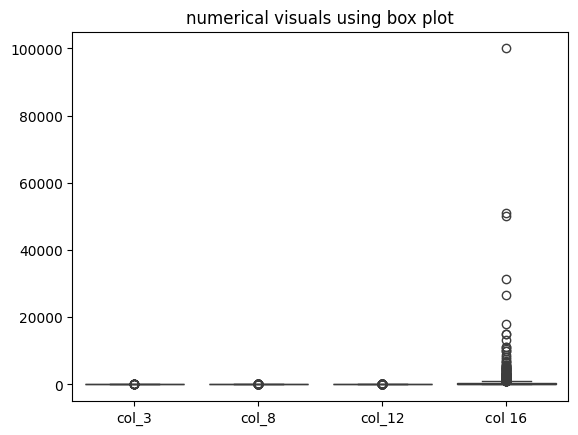

In [72]:
plt.Figure(figsize=(6, 4))
sn.boxplot(data=credit_card_approval[num_columns])
plt.title('numerical visuals using box plot')
plt.show()

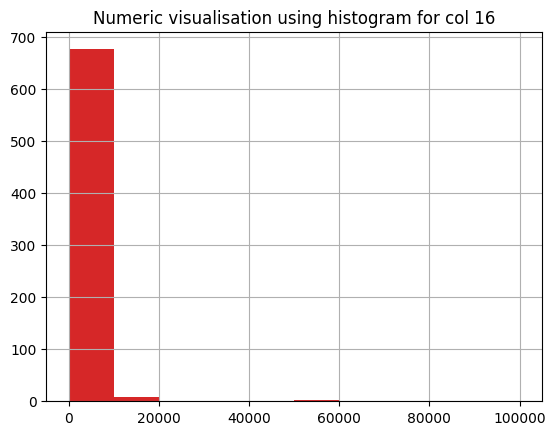

In [73]:
#Univariate analysis
for i in num_columns:
    plt.Figure()
    credit_card_approval[i].hist()
    plt.title(f'Numeric visualisation using histogram for {i}')
    

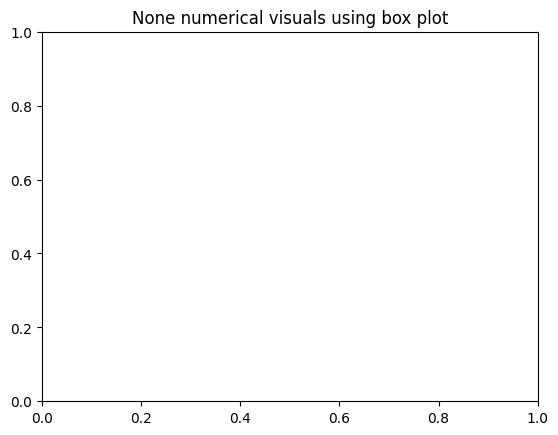

In [74]:
plt.Figure(figsize=(6, 4))
sn.boxplot(data=credit_card_approval[non_num_columns])
plt.title('None numerical visuals using box plot')
plt.show()

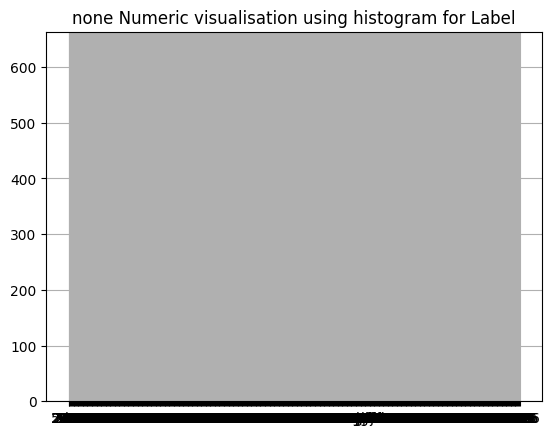

In [75]:
for i in non_num_columns:
    plt.Figure()
    credit_card_approval[i].hist()
    plt.title(f'none Numeric visualisation using histogram for {i}')

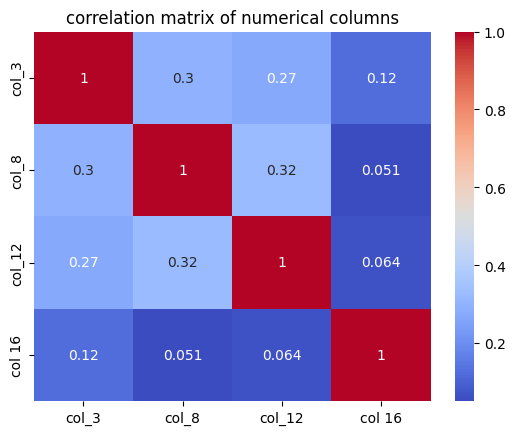

In [76]:
# MUltivariate
cor = credit_card_approval[num_columns].corr()
plt.Figure(figsize=(8, 6))
sn.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('correlation matrix of numerical columns')
plt.show()

In [77]:

X = credit_card_approval.drop(columns=['Label'])
y = credit_card_approval['Label']



In [85]:

# ecode none numeric value

label_encoders = {}
for i in non_num_columns:
    le = LabelEncoder()
    credit_card_approval[i] = le.fit_transform(credit_card_approval[i])
    label_encoders[i] = le



In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [87]:
print(X_train)
print(X_test)

     col_1  col_2   col_3 col_4 col_5 col_6 col_7   col_8 col_9,col_10 col_11  \
278    254  16.25   0.835     u     g     m     v   0.085            t      f   
110    286  24.50   1.040     y     p    ff    ff   0.500            t      t   
82     269  22.67   3.500     u     g     d     v   3.000            t      f   
51     102  37.42   2.040     u     g     w     v   0.040            t      f   
218    190  18.92   9.250     y     p     c     v   1.000            t      t   
..     ...    ...     ...   ...   ...   ...   ...     ...          ...    ...   
71     110  38.58   5.000     u     g    cc     v  13.500            t      f   
106    291  25.00  11.000     y     p    aa     v   4.500            t      f   
270     61  32.33   2.500     u     g     c     v   1.250            f      f   
435    236  19.58   0.585     u     g    ff    ff   0.000            f      t   
102    291  25.00  12.000     u     g     k     v   2.250            t      t   

     col_12 col_13 col_14 c

In [90]:
model_full = LogisticRegression(random_state=42)
model_full.fit(X_train, y_train)



ValueError: could not convert string to float: 'u'